In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from tqdm import tqdm

from sklearn import metrics
from sklearn import datasets
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [2]:
# 데이터 불러오기
dataDf = pd.read_csv('./stockdata/SK하이닉스 주식데이터 합치기.csv', encoding='euc-kr')
dataDfCopy = dataDf.copy()

In [3]:
# 전처리
# dap = [0]
# for i in range(dataDfCopy.shape[0]): # 0은 전날 주가랑 오늘 주가가 변화없거나 전날 주가보다 상승했다면, 1은 전날 주가보다 하락했다면
#     if i < 94807:
#         if dataDfCopy['종가'][i+1] == dataDfCopy['종가'][i]:
#             dap.append(0)
#         elif dataDfCopy['종가'][i+1] > dataDfCopy['종가'][i]:
#             dap.append(0)
#         else:
#             dap.append(1)
# dataDfCopy['Label'] = dap
dataDfCopy.drop(['종목코드','종목명','날짜','시간'], axis=1, inplace=True)

data = dataDfCopy.iloc[:,:-1]
# label = dataDfCopy['Label']
label = dataDfCopy['종가']

minMaxScale = MinMaxScaler()
dataScale = minMaxScale.fit_transform(data)
aaaa = pd.DataFrame(dataScale)

trainData = aaaa.iloc[:94608]
trainLabel = label.iloc[:94608]
siljaeData = aaaa.iloc[94608:]
siljaeLabel = label.iloc[94608:]

x_train, x_test, y_train, y_test = train_test_split(trainData, trainLabel, test_size=0.1, random_state=0)

In [4]:
# KNN(KNeighborsClassifier)
number = []
accuracy = []

for i in tqdm(range(1,11)):
    knn = KNeighborsClassifier(n_neighbors=i).fit(x_train, y_train)
    knnResult = knn.predict(siljaeData)
    number.append(i)
    accuracy.append(round(metrics.accuracy_score(siljaeLabel, knnResult)*100, 1))

KnnResultDf = pd.DataFrame({
      'n_neighbors 값':number
    , '정확도(%)':accuracy
})
KnnResultDf

100%|██████████| 10/10 [00:00<00:00, 18.21it/s]


,n_neighbors 값,정확도(%)
0,1,15.0
1,2,8.0
2,3,8.5
3,4,10.5
4,5,10.0
5,6,10.5
6,7,10.5
7,8,10.5
8,9,10.5
9,10,9.5


In [5]:
knn = KNeighborsClassifier(n_neighbors=1).fit(x_train, y_train)
knnResult = knn.predict(siljaeData)

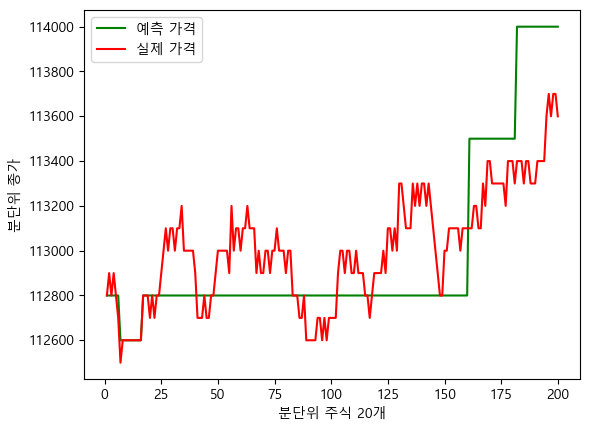

In [6]:
# KNN 주식 예측 결과 시각화
plt.rc('font', family='Malgun Gothic')
plt.plot(range(1,201), knnResult, 'g', label='예측 가격')
plt.plot(range(1,201), siljaeLabel, 'r', label='실제 가격')
plt.xlabel('분단위 주식 20개')
plt.ylabel('분단위 종가')
plt.legend()
plt.show()

In [7]:
# LogisticRegression
logic = LogisticRegression(random_state=0, n_jobs=-1)
logic.fit(x_train, y_train)
logiResult = logic.predict(siljaeData)
print('정확도 :'+str(round(metrics.accuracy_score(siljaeLabel, logiResult)*100, 1))+'%')

정확도 :0.0%


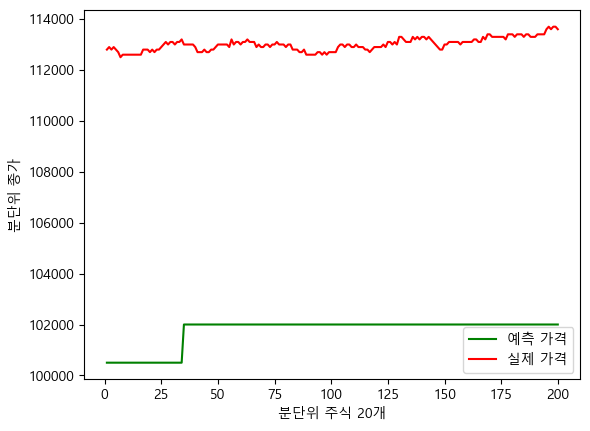

In [8]:
# LogisticRegression 주식 예측 결과 시각화
plt.rc('font', family='Malgun Gothic')
plt.plot(range(1,201), logiResult, 'g', label='예측 가격')
plt.plot(range(1,201), siljaeLabel, 'r', label='실제 가격')
plt.xlabel('분단위 주식 20개')
plt.ylabel('분단위 종가')
plt.legend()
plt.show()

In [9]:
# DecisionTree
dct = DecisionTreeClassifier(random_state=0)
dct.fit(x_train, y_train)
dctResult = dct.predict(siljaeData)
print('정확도 :'+str(round(metrics.accuracy_score(siljaeLabel, dctResult)*100, 1))+'%')

정확도 :100.0%


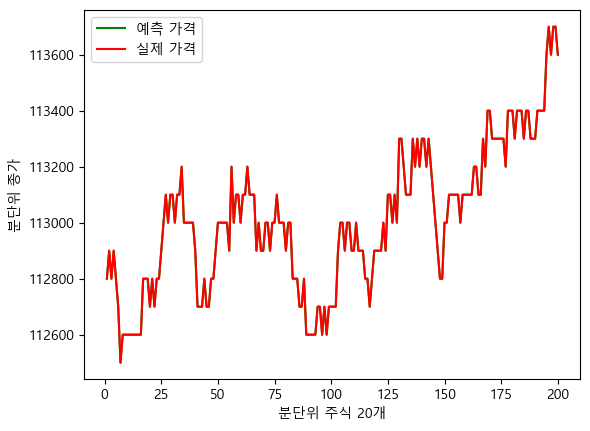

In [10]:
# DecisionTree 주식 예측 결과 시각화
plt.rc('font', family='Malgun Gothic')
plt.plot(range(1,201), dctResult, 'g', label='예측 가격')
plt.plot(range(1,201), siljaeLabel, 'r', label='실제 가격')
plt.xlabel('분단위 주식 20개')
plt.ylabel('분단위 종가')
plt.legend()
plt.show()

In [11]:
# RandomForest
param = {
      'n_estimators':[100]
    , 'max_depth':[2,4,8]
    , 'min_samples_leaf':[4,8,12]
    , 'min_samples_split':[4,8,12]
}

rfc = RandomForestClassifier(random_state=0, n_jobs=-1)
grid_rfc = GridSearchCV(rfc, param_grid=param, cv=2, n_jobs=-1)
grid_rfc.fit(x_train, y_train)
rfcResult = grid_rfc.predict(siljaeData)

c:\Users\pig63\anaconda3\envs\ml-dev\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


In [13]:
rfc = RandomForestClassifier(random_state=0, n_jobs=-1)
rfc.fit(x_train, y_train)
rfcResult = rfc.predict(siljaeData)
print('정확도 :'+str(round(metrics.accuracy_score(siljaeLabel, rfcResult)*100, 1))+'%')

정확도 :83.5%


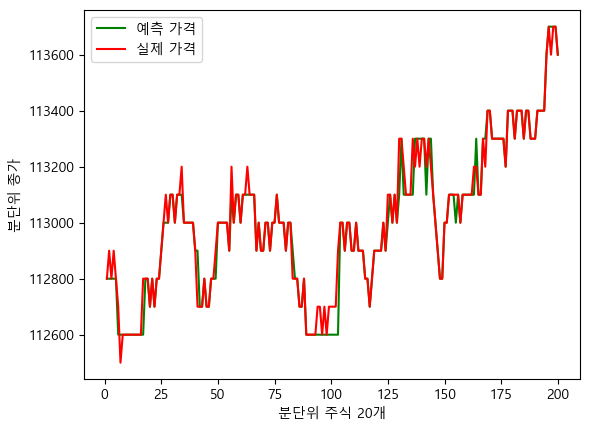

In [14]:
# RandomForest 주식 예측 결과 시각화
plt.rc('font', family='Malgun Gothic')
plt.plot(range(1,201), rfcResult, 'g', label='예측 가격')
plt.plot(range(1,201), siljaeLabel, 'r', label='실제 가격')
plt.xlabel('분단위 주식 20개')
plt.ylabel('분단위 종가')
plt.legend()
plt.show()